<a href="https://colab.research.google.com/github/Sanyam-Jain1/Chess_elo_predictor/blob/main/EDA_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
df = pd.read_csv('chess_data.csv')
df.head()

,White Elo,Black Elo,White Rating Diff,Black Rating Diff,Opening,Result,Termination,White Accuracy,Black Accuracy,White Blunders,...,White Avg CPL,Black Avg CPL,White Best Move %,Black Best Move %,white_win,black_win,elo_bins,Win,Elo Bracket,Avg Elo
0,930,983,-5.0,5.0,French Defense: Mediterranean Defense,0-1,Normal,72.7,83.2,3,...,64.0,30.3,32.1,35.7,0.0,1.0,1000,0.0,800-1200,956.5
1,1505,1508,-17.0,6.0,Queen's Pawn Game,0-1,Normal,62.8,74.4,2,...,79.1,42.3,19.0,52.4,0.0,1.0,1500,0.0,1200-1600,1506.5
2,1809,1844,-5.0,5.0,English Opening: King's English Variation,0-1,Normal,80.1,87.8,0,...,27.0,15.6,35.7,28.6,0.0,1.0,1800,0.0,1600-2000,1826.5
3,1368,1339,6.0,-5.0,Pirc Defense,1-0,Normal,66.8,69.4,3,...,201.1,158.7,60.0,35.7,1.0,0.0,1400,1.0,1200-1600,1353.5
4,1663,1616,5.0,-5.0,Modern Defense,1-0,Normal,77.4,64.4,2,...,48.8,73.1,47.1,24.2,1.0,0.0,1600,1.0,1600-2000,1639.5


In [ ]:
df.columns

Index(['White Elo', 'Black Elo', 'White Rating Diff', 'Black Rating Diff',
       'Opening', 'Result', 'Termination', 'White Accuracy', 'Black Accuracy',
       'White Blunders', 'White Mistakes', 'White Inaccuracies',
       'Black Blunders', 'Black Mistakes', 'Black Inaccuracies',
       'White Avg CPL', 'Black Avg CPL', 'White Best Move %',
       'Black Best Move %', 'white_win', 'black_win', 'elo_bins', 'Win',
       'Elo Bracket', 'Avg Elo'],
      dtype='object')

In [ ]:
features = ['White Accuracy', 'White Blunders', 'White Mistakes', 'White Inaccuracies','Black Accuracy','Black Blunders', 'Black Mistakes', 'Black Inaccuracies',
       'White Avg CPL', 'Black Avg CPL', 'White Best Move %','Black Best Move %' ]

In [ ]:
X = df[features]


In [ ]:
X.head()

,White Accuracy,White Blunders,White Mistakes,White Inaccuracies,Black Accuracy,Black Blunders,Black Mistakes,Black Inaccuracies,White Avg CPL,Black Avg CPL,White Best Move %,Black Best Move %
0,72.7,3,2,5,83.2,1,1,4,64.0,30.3,32.1,35.7
1,62.8,2,2,6,74.4,0,4,2,79.1,42.3,19.0,52.4
2,80.1,0,0,3,87.8,0,0,1,27.0,15.6,35.7,28.6
3,66.8,3,1,1,69.4,2,2,0,201.1,158.7,60.0,35.7
4,77.4,2,4,1,64.4,6,2,5,48.8,73.1,47.1,24.2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22809 entries, 0 to 22808
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   White Accuracy      22809 non-null  float64
 1   White Blunders      22809 non-null  int64  
 2   White Mistakes      22809 non-null  int64  
 3   White Inaccuracies  22809 non-null  int64  
 4   Black Accuracy      22809 non-null  float64
 5   Black Blunders      22809 non-null  int64  
 6   Black Mistakes      22809 non-null  int64  
 7   Black Inaccuracies  22809 non-null  int64  
 8   White Avg CPL       22809 non-null  float64
 9   Black Avg CPL       22809 non-null  float64
 10  White Best Move %   22809 non-null  float64
 11  Black Best Move %   22809 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.1 MB


In [ ]:
X.describe()

,White Accuracy,White Blunders,White Mistakes,White Inaccuracies,Black Accuracy,Black Blunders,Black Mistakes,Black Inaccuracies,White Avg CPL,Black Avg CPL,White Best Move %,Black Best Move %
count,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000,22809.000000
mean,72.626836,2.645052,2.912929,3.959051,72.421014,2.509886,2.912271,3.926783,72.198496,62.705844,39.264435,38.196611
std,9.513325,2.241046,2.269012,2.709980,10.341794,2.206103,2.255624,2.710077,46.629337,36.804999,12.414770,12.199035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.400000,1.000000,1.000000,2.000000,67.100000,1.000000,1.000000,2.000000,41.800000,38.200000,31.700000,30.800000
50%,73.300000,2.000000,3.000000,4.000000,73.400000,2.000000,3.000000,4.000000,62.200000,56.000000,38.700000,38.100000
75%,78.800000,4.000000,4.000000,6.000000,78.900000,4.000000,4.000000,6.000000,91.500000,79.000000,46.200000,45.500000
max,100.000000,20.000000,17.000000,18.000000,100.000000,19.000000,21.000000,17.000000,700.300000,535.500000,100.000000,100.000000


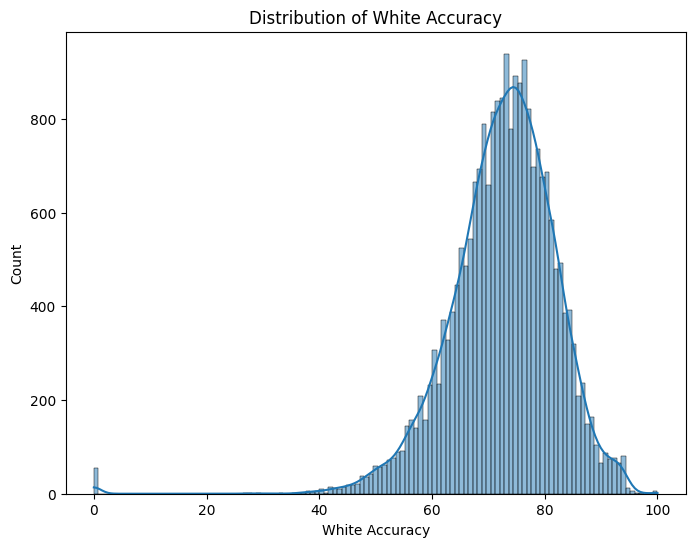

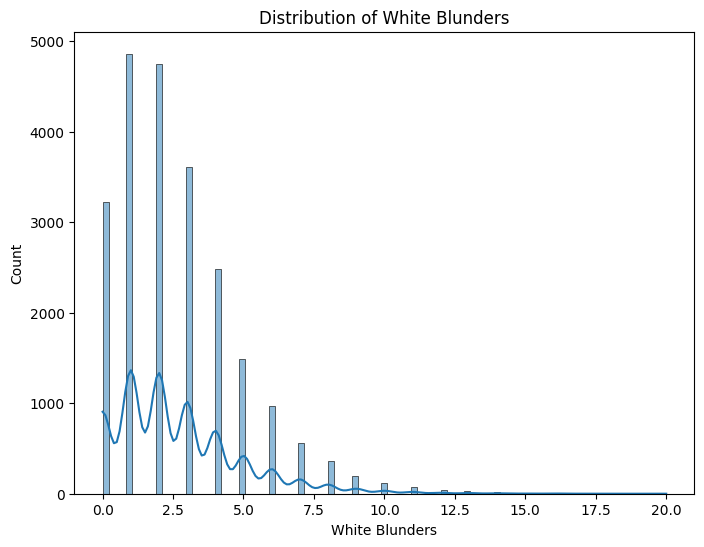

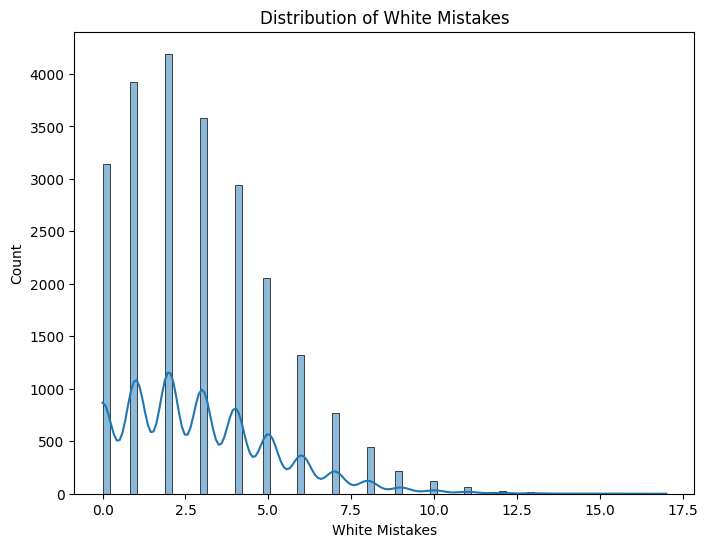

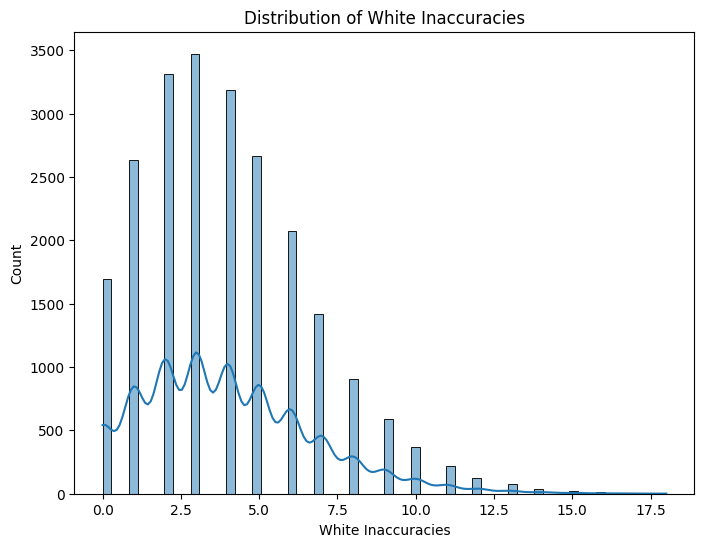

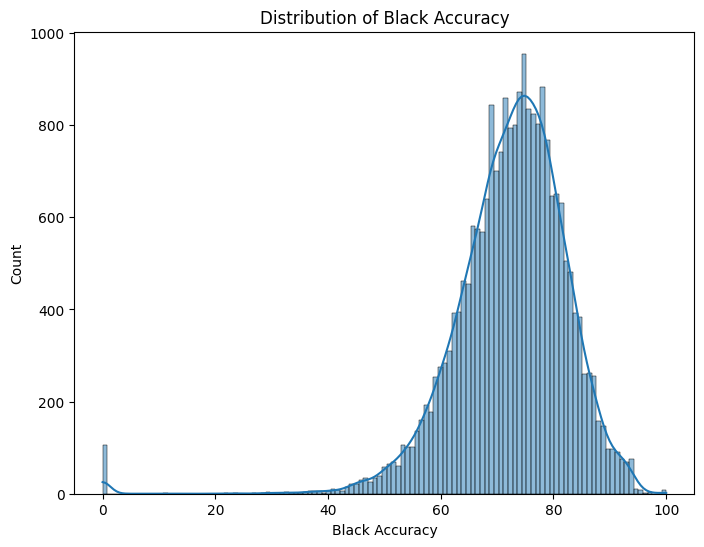

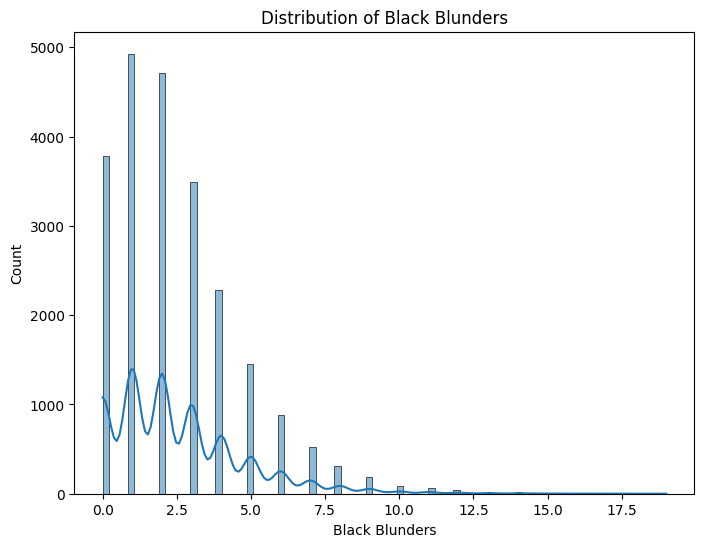

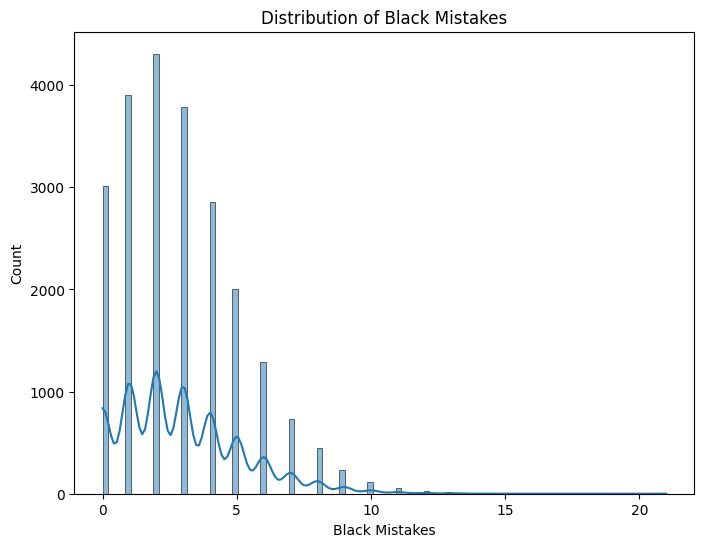

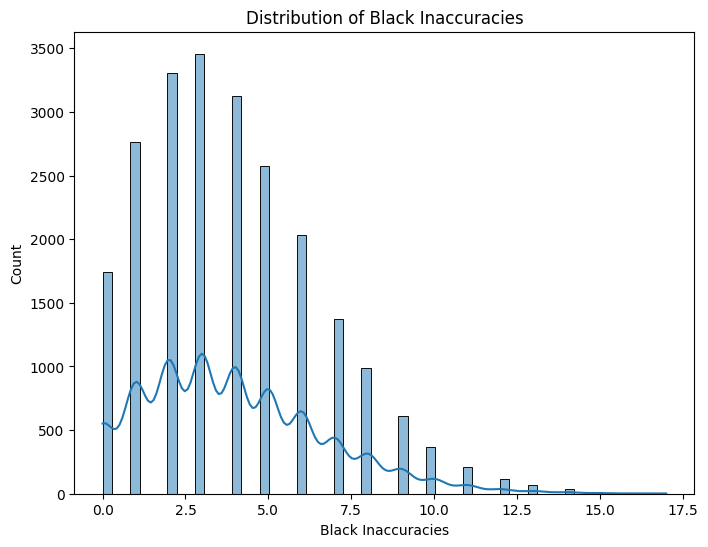

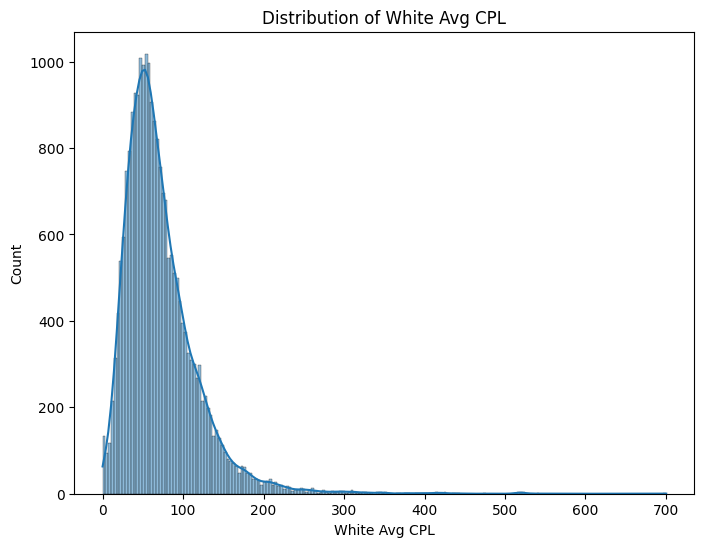

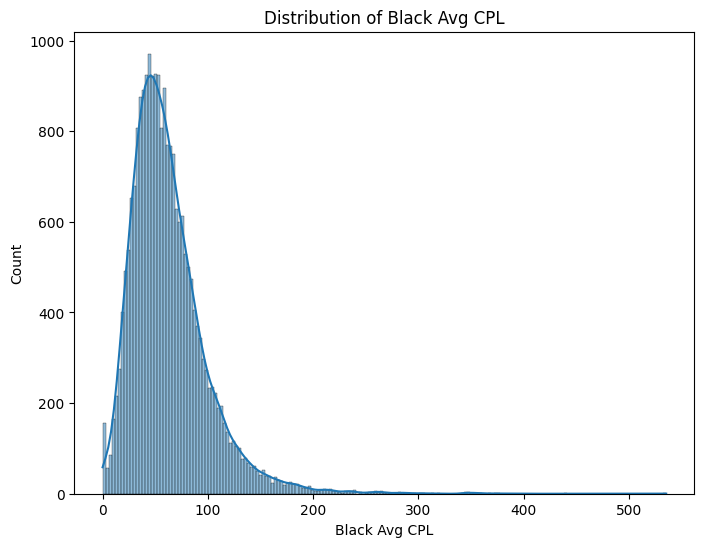

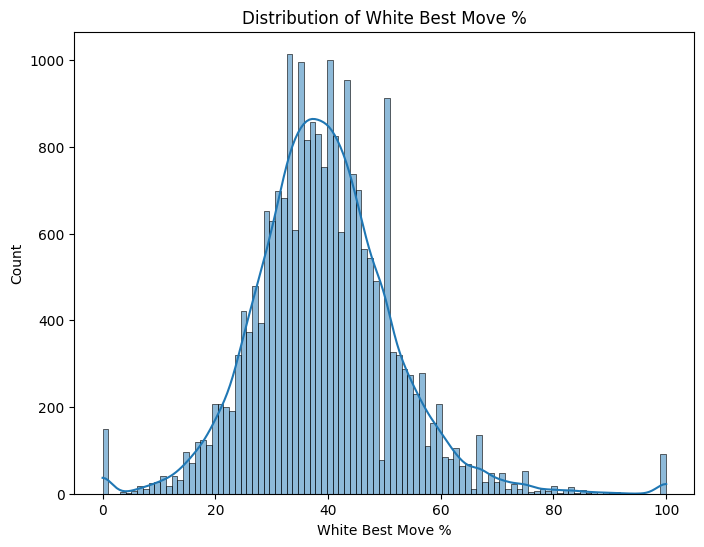

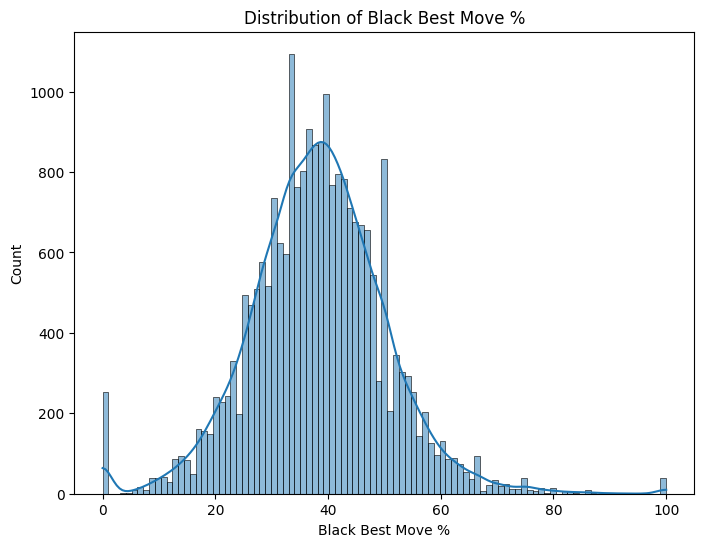

In [ ]:
for column in X.select_dtypes(include=np.number).columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(X[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

In [ ]:
corr = X
corr['White Elo'] = df['White Elo']
corr['Black Elo'] = df['Black Elo']

corr_matrix = corr.corr()


<ipython-input-10-d85297e2a0d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr['White Elo'] = df['White Elo']
<ipython-input-10-d85297e2a0d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr['Black Elo'] = df['Black Elo']


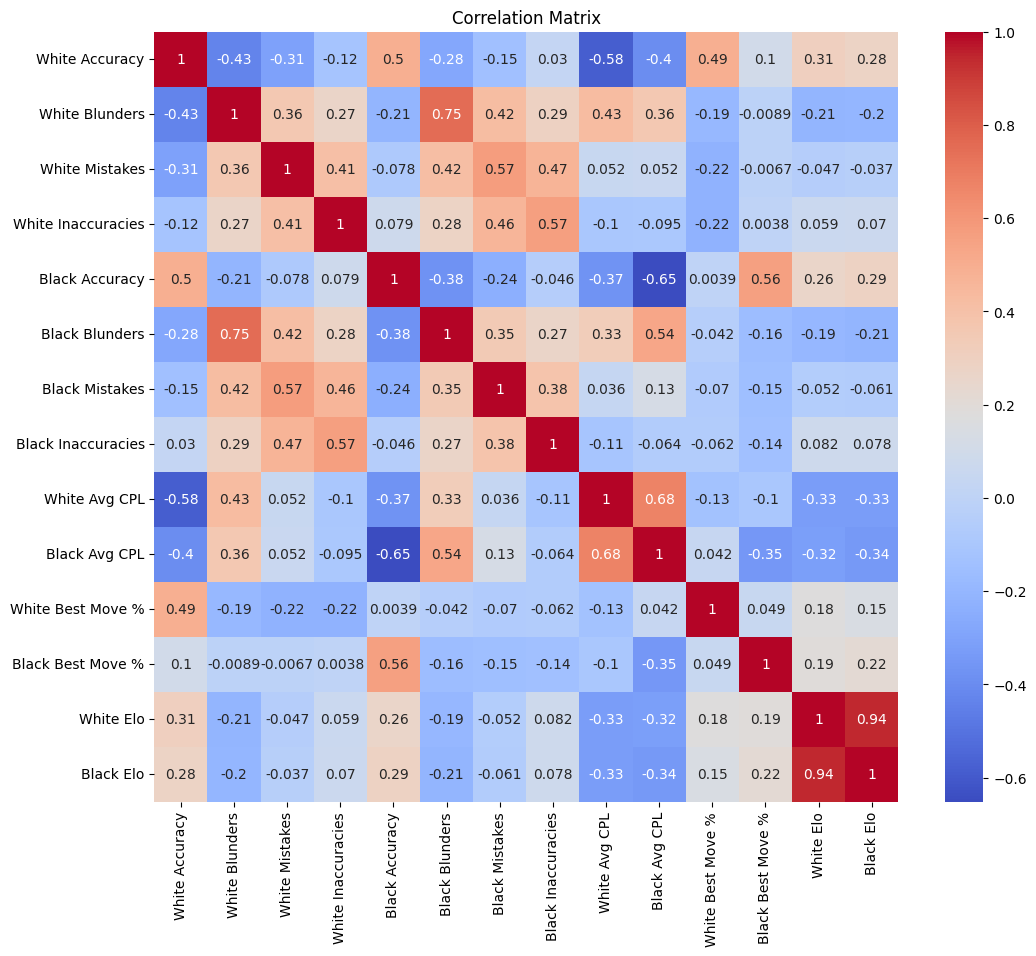

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
y = df['White Elo']

In [ ]:
y

,White Elo
0,930
1,1505
2,1809
3,1368
4,1663
...,...
22804,1011
22805,1801
22806,1659
22807,1500


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



In [ ]:
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [ ]:
X_standardized = X_standardized.drop(columns=['White Elo', 'Black Elo'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.25)


In [ ]:
X_train.describe()

,White Accuracy,White Blunders,White Mistakes,White Inaccuracies,Black Accuracy,Black Blunders,Black Mistakes,Black Inaccuracies,White Avg CPL,Black Avg CPL,White Best Move %,Black Best Move %
count,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000,17106.000000
mean,0.000975,-0.003294,0.007328,0.004713,0.000938,-0.003978,0.006679,0.001412,-0.005988,-0.007588,0.000463,0.000813
std,1.003065,0.995191,1.009563,1.005205,1.007984,0.998569,1.003035,1.000781,0.987760,0.991120,1.000207,1.010154
min,-7.634389,-1.180302,-1.283815,-1.460947,-7.002905,-1.137726,-1.291144,-1.448988,-1.548383,-1.703769,-3.162789,-3.131186
25%,-0.549435,-0.734072,-0.843085,-0.722918,-0.514527,-0.684428,-0.847798,-0.710986,-0.654077,-0.665844,-0.609323,-0.606341
50%,0.070762,-0.287842,0.038375,0.015111,0.094665,-0.231130,0.038894,0.027017,-0.212285,-0.187637,-0.045466,-0.007920
75%,0.648911,0.604618,0.479105,0.753140,0.626499,0.675465,0.482240,0.765020,0.409655,0.434574,0.558667,0.598699
max,2.877413,7.744297,6.208596,5.181314,2.666809,6.568339,7.132430,4.824034,10.054009,10.262259,4.892309,5.066363


In [ ]:
X_train.head()

,White Accuracy,White Blunders,White Mistakes,White Inaccuracies,Black Accuracy,Black Blunders,Black Mistakes,Black Inaccuracies,White Avg CPL,Black Avg CPL,White Best Move %,Black Best Move %
20067,0.880170,-0.734072,-1.283815,-0.353904,0.645839,-0.231130,-0.847798,-1.448988,1.449795,0.521521,1.871648,0.147834
7438,-0.139474,-0.734072,0.038375,-1.091933,-1.346122,0.222167,-0.404452,-0.341984,1.612786,0.722585,-0.923472,-1.688417
7839,1.027336,-0.287842,0.038375,-0.353904,1.332389,-1.137726,-0.404452,0.027017,-0.838514,-1.228280,0.792264,0.598699
14556,-1.453450,0.158388,1.360565,-0.353904,-0.814288,-0.684428,1.368932,0.396018,0.591947,0.013427,-1.076518,0.205217
220,0.533281,0.158388,0.038375,-0.353904,-0.021371,-0.231130,0.038894,1.872024,0.276688,-0.274584,-0.166292,-0.786687


In [ ]:
X_train.columns

Index(['White Accuracy', 'White Blunders', 'White Mistakes',
       'White Inaccuracies', 'Black Accuracy', 'Black Blunders',
       'Black Mistakes', 'Black Inaccuracies', 'White Avg CPL',
       'Black Avg CPL', 'White Best Move %', 'Black Best Move %'],
      dtype='object')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
# print("Model Coefficients:", model.coef_)
# print("Model Intercept:", model.intercept_)


Mean Absolute Error (MAE): 241.01914404840284
Root Mean Squared Error (RMSE): 297.34361141943833
R-squared (R2): 0.19570753167381227


In [ ]:
# y_test[0]

In [ ]:
y_pred

array([1168.68362889, 1654.78650638, 1513.18649969, ..., 1778.78345869,
       1767.75342326, 1648.29165053])

In [ ]:
y_test

,White Elo
3060,1545
12280,1729
10099,1902
5913,1835
11380,1544
...,...
5663,1898
5335,1482
15480,2219
6667,1678


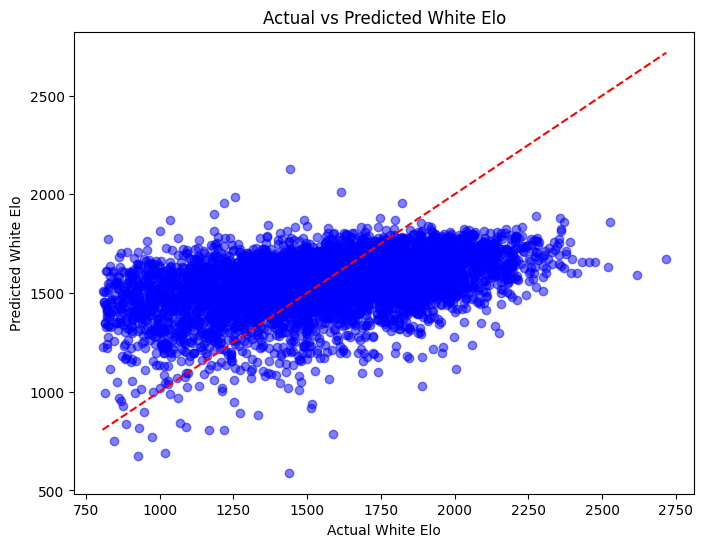

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual White Elo")
plt.ylabel("Predicted White Elo")
plt.title("Actual vs Predicted White Elo")
plt.show()


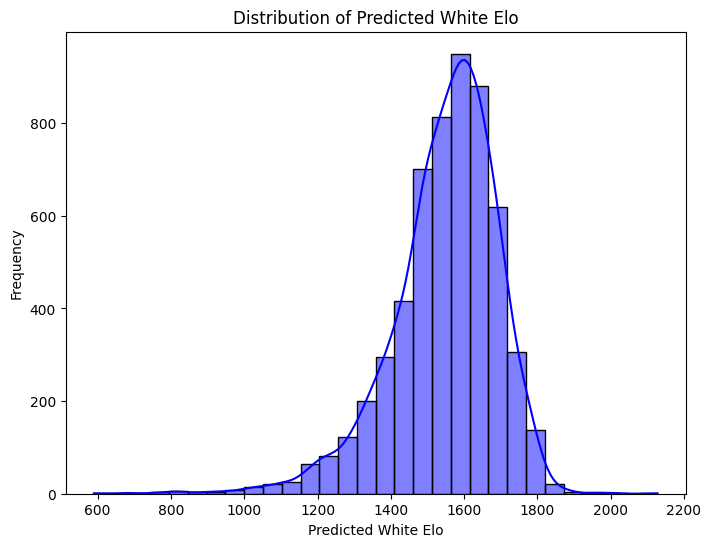

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(y_pred, bins=30, kde=True, color="blue")  # Histogram with KDE
plt.xlabel("Predicted White Elo")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted White Elo")
plt.show()


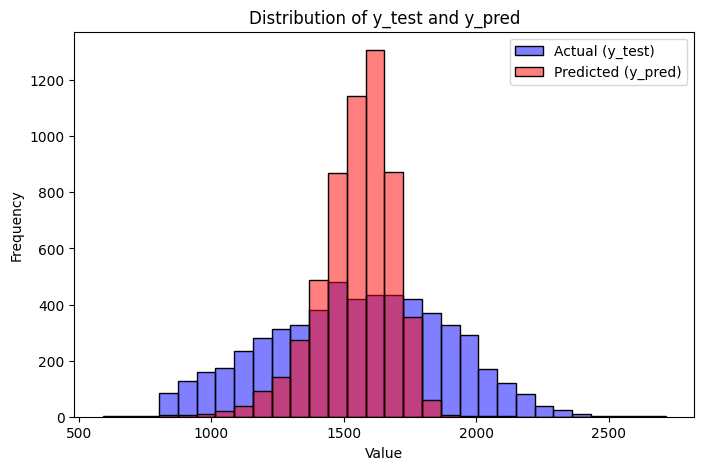

In [ ]:
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=30, color="blue", label="Actual (y_test)", alpha=0.5, binrange=(min_val, max_val))
sns.histplot(y_pred, bins=30, color="red", label="Predicted (y_pred)", alpha=0.5, binrange=(min_val, max_val))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of y_test and y_pred")
plt.legend()
plt.show()

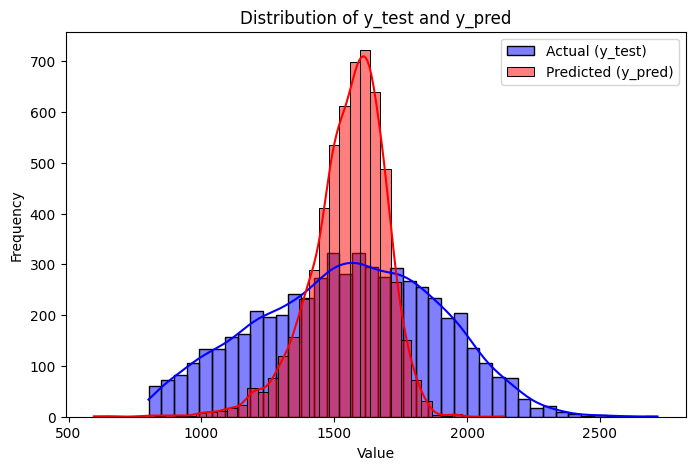

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=40, color="blue", label="Actual (y_test)", alpha=0.5, kde=True)
sns.histplot(y_pred, bins=40, color="red", label="Predicted (y_pred)", alpha=0.5, kde=True)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of y_test and y_pred")
plt.legend()
plt.show()


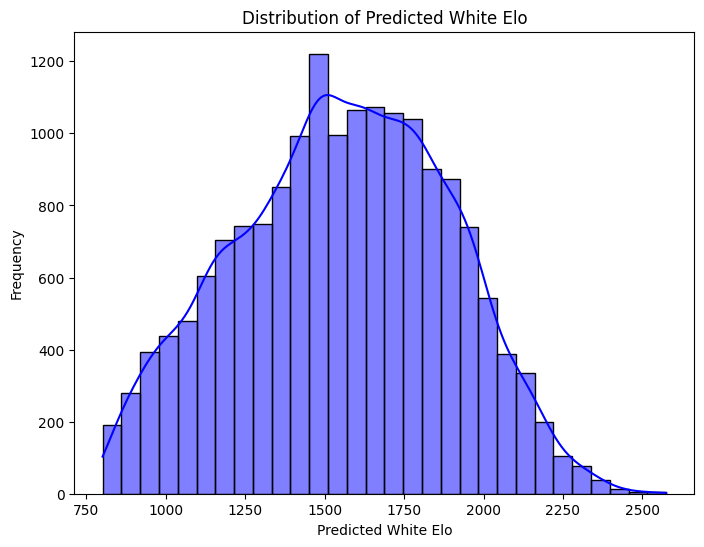

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(y_train, bins=30, kde=True, color="blue")  # Histogram with KDE
plt.xlabel("Predicted White Elo")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted White Elo")
plt.show()


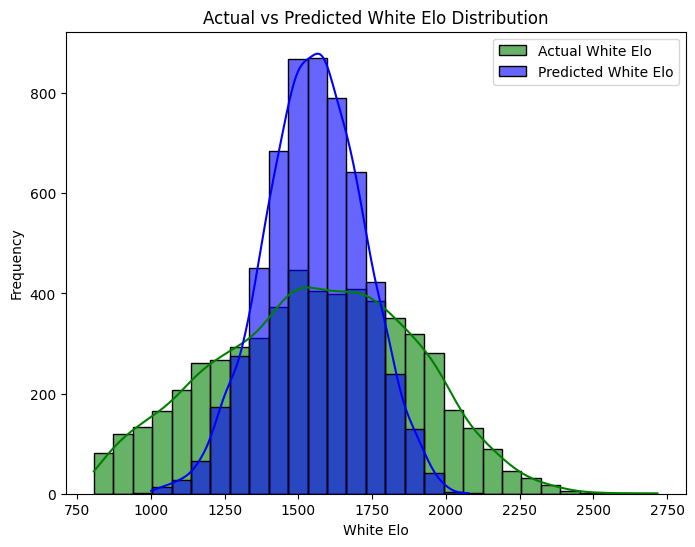

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Find the min and max across both y_pred and y_test
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Create fixed bin edges
bin_edges = np.linspace(min_val, max_val, 30)  # 30 bins from min to max

# Plot both distributions with the same bin edges
plt.figure(figsize=(8,6))
sns.histplot(y_test, bins=bin_edges, kde=True, color="green", label="Actual White Elo", alpha=0.6)
sns.histplot(y_pred, bins=bin_edges, kde=True, color="blue", label="Predicted White Elo", alpha=0.6)

# Labels and legend
plt.xlabel("White Elo")
plt.ylabel("Frequency")
plt.title("Actual vs Predicted White Elo Distribution")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # Convert X_train to tensor and normalize it
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)

# Assuming you have y_train as the Elo ratings
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Split into train and validation sets
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Define the neural network
class EloNN(nn.Module):
    def __init__(self):
        super(EloNN, self).__init__()
        self.fc1 = nn.Linear(12, 64)  # 12 input features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)   # Single output (Elo prediction)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = EloNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    predictions = model(X_train_nn)
    loss = criterion(predictions, y_train_nn)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model.eval()
        val_preds = model(X_val_nn)
        val_loss = criterion(val_preds, y_val_nn)
        print(f"Epoch {epoch}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# Final validation
model.eval()
val_preds = model(X_val_nn).detach().numpy()
train_preds = model(X_train_nn).detach().numpy()

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"MAE: {mean_absolute_error(y_val_nn, val_preds):.4f}")
print(f"RMSE: {mean_squared_error(y_val_nn, val_preds) ** 0.5:.4f}")  # Manually taking the square root
print(f"R² Score: {r2_score(y_val_nn, val_preds):.4f}")


ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
X_train_nn

tensor([[ 0.6460, -0.2859, -0.8424,  ..., -1.0041,  1.2024,  1.6307],
        [ 1.3272, -1.1827, -0.4058,  ..., -0.5518,  0.2923,  1.1113],
        [ 0.8661, -0.7343, -0.4058,  ..., -0.1872,  0.8641, -1.1448],
        ...,
        [ 0.0696, -0.7343, -0.4058,  ...,  0.2570,  0.8641,  0.6487],
        [ 0.9185, -0.7343, -1.2790,  ...,  0.8491,  0.6306,  0.4539],
        [ 0.2058,  0.1625, -1.2790,  ..., -1.1193, -1.1493,  0.2835]])

In [ ]:
X_train

,White Accuracy,White Blunders,White Mistakes,White Inaccuracies,Black Accuracy,Black Blunders,Black Mistakes,Black Inaccuracies,White Avg CPL,Black Avg CPL,White Best Move %,Black Best Move %
8892,0.070762,-0.734072,0.038375,0.015111,1.477434,-1.137726,-0.847798,-1.079987,-0.626197,-1.222846,-0.262953,0.475736
4549,0.165368,0.158388,2.242025,-0.722918,0.375087,0.222167,0.038894,1.134021,-0.002112,0.334042,0.526446,1.139737
11380,0.943241,-0.287842,0.038375,-0.353904,1.022958,0.675465,-1.291144,0.027017,-0.726994,-0.801698,0.292848,1.049564
17043,1.090406,0.158388,-0.402355,0.015111,0.858573,-0.231130,0.038894,1.134021,-0.606895,-0.866908,0.727824,0.697070
15299,1.206036,-1.180302,-1.283815,0.384125,0.230041,-0.684428,-0.404452,0.765020,-1.115170,-0.638673,0.502281,-0.827675
...,...,...,...,...,...,...,...,...,...,...,...,...
6440,-0.402269,-0.287842,1.801295,0.015111,0.017307,-0.231130,0.038894,1.134021,-0.227297,-0.426741,-1.511494,0.229809
5908,1.500367,-1.180302,-1.283815,-1.091933,-0.234105,-0.684428,-1.291144,-1.448988,-1.340355,1.154601,2.209962,-1.491676
238,-0.759671,-0.287842,0.038375,0.753140,-0.359811,-0.684428,0.482240,0.027017,0.135143,-0.021895,-1.551769,-0.401402
14849,-0.044868,1.050848,-0.843085,0.015111,-0.562875,0.675465,1.368932,-0.341984,0.199482,0.616619,-0.335449,-0.253846


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=12))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2503123.0000 - mae: 1545.8196 - val_loss: 2441727.5000 - val_mae: 1525.3729
Epoch 2/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2406564.7500 - mae: 1514.2236 - val_loss: 2206316.0000 - val_mae: 1446.0709
Epoch 3/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2131507.5000 - mae: 1420.0170 - val_loss: 1839751.3750 - val_mae: 1310.0712
Epoch 4/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1772067.5000 - mae: 1281.5591 - val_loss: 1449313.8750 - val_mae: 1142.3599
Epoch 5/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1380157.5000 - mae: 1108.4037 - val_loss: 1105993.0000 - val_mae: 970.3270
Epoch 6/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1050104.5000 - mae: 940.3892 - val_loss: 847542.6875 - val_mae: 824.0363
Epoch 7/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 816928.0625 - mae: 802.5790 - val_loss: 678584.2500 - val_mae: 716.9631
Epoch 8/100
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

In [ ]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=12))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))
  optimizer = hp.Choice('optimizer', values=['adam', 'sgd','rmsprop','adagrad'])
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
  return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,
    overwrite=True,
    directory='my_dir',
    project_name='regression_tuning'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train, y_train, epochs=20, validation_data = (X_test, y_test))

Trial 4 Complete [00h 00m 47s]
val_mae: 1545.62158203125

Best val_mae So Far: 261.51068115234375
Total elapsed time: 00h 03m 03s


In [ ]:
for trial_id, trial in tuner.oracle.trials.items():
    optimizer = trial.hyperparameters.get('optimizer')
    val_mae = trial.metrics.get_last_value('val_mae')
    print(f"Trial {trial_id} → Optimizer: {optimizer}, val_mae: {val_mae}")


Trial 0 → Optimizer: adam, val_mae: 261.51068115234375
Trial 1 → Optimizer: sgd, val_mae: nan
Trial 2 → Optimizer: rmsprop, val_mae: 273.55706787109375
Trial 3 → Optimizer: adagrad, val_mae: 1545.62158203125


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}